In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

df_rides=pd.read_csv("cab_rides.csv")
df_weather=pd.read_csv("weather.csv")


## Exploratory Data Analysis


### 1. Data Collection

In [2]:
df_rides

distance cab_type     time_stamp    destination            source  \
0           0.44     Lyft  1544952607890  North Station  Haymarket Square   
1           0.44     Lyft  1543284023677  North Station  Haymarket Square   
2           0.44     Lyft  1543366822198  North Station  Haymarket Square   
3           0.44     Lyft  1543553582749  North Station  Haymarket Square   
4           0.44     Lyft  1543463360223  North Station  Haymarket Square   
...          ...      ...            ...            ...               ...   
693066      1.00     Uber  1543708385534      North End          West End   
693067      1.00     Uber  1543708385534      North End          West End   
693068      1.00     Uber  1543708385534      North End          West End   
693069      1.00     Uber  1543708385534      North End          West End   
693070      1.00     Uber  1543708385534      North End          West End   

        price  surge_multiplier                                    id  \
0         5.0               1.0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7   
1        11.0               1.0  4bd23055-6827-41c6-b23b-3c491f24e74d   
2         7.0               1.0  981a3613-77af-4620-a42a-0c0866077d1e   
3        26.0               1.0  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   
4         9.0               1.0  e0126e1f-8ca9-4f2e-82b3-50505a09db9a   
...       ...               ...                                   ...   
693066   13.0               1.0  616d3611-1820-450a-9845-a9ff304a4842   
693067    9.5               1.0  633a3fc3-1f86-4b9e-9d48-2b7132112341   
693068    NaN               1.0  64d451d0-639f-47a4-9b7c-6fd92fbd264f   
693069   27.0               1.0  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e   
693070   10.0               1.0  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda   

                                  product_id          name  
0                                  lyft_line        Shared  
1                               lyft_premier           Lux  
2                                       lyft          Lyft  
3                                lyft_luxsuv  Lux Black XL  
4                                  lyft_plus       Lyft XL  
...                                      ...           ...  
693066  6f72dfc5-27f1-42e8-84db-ccc7a75f6969        UberXL  
693067  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX  
693068  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a          Taxi  
693069  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  
693070  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  

[693071 rows x 10 columns]

In [3]:
df_weather

temp                 location  clouds  pressure    rain  time_stamp  \
0     42.42                 Back Bay    1.00   1012.14  0.1228  1545003901   
1     42.43              Beacon Hill    1.00   1012.15  0.1846  1545003901   
2     42.50        Boston University    1.00   1012.15  0.1089  1545003901   
3     42.11                   Fenway    1.00   1012.13  0.0969  1545003901   
4     43.13       Financial District    1.00   1012.14  0.1786  1545003901   
...     ...                      ...     ...       ...     ...         ...   
6271  44.72            North Station    0.89   1000.69     NaN  1543819974   
6272  44.85  Northeastern University    0.88   1000.71     NaN  1543819974   
6273  44.82            South Station    0.89   1000.70     NaN  1543819974   
6274  44.78         Theatre District    0.89   1000.70     NaN  1543819974   
6275  44.69                 West End    0.89   1000.70     NaN  1543819974   

      humidity   wind  
0         0.77  11.25  
1         0.76  11.32  
2         0.76  11.07  
3         0.77  11.09  
4         0.75  11.49  
...        ...    ...  
6271      0.96   1.52  
6272      0.96   1.54  
6273      0.96   1.54  
6274      0.96   1.54  
6275      0.96   1.52  

[6276 rows x 8 columns]

Printing all numerical values

In [4]:
df_rides.describe()

distance    time_stamp          price  surge_multiplier
count  693071.000000  6.930710e+05  637976.000000     693071.000000
mean        2.189430  1.544046e+12      16.545125          1.013870
std         1.138937  6.891925e+08       9.324359          0.091641
min         0.020000  1.543204e+12       2.500000          1.000000
25%         1.280000  1.543444e+12       9.000000          1.000000
50%         2.160000  1.543737e+12      13.500000          1.000000
75%         2.920000  1.544828e+12      22.500000          1.000000
max         7.860000  1.545161e+12      97.500000          3.000000

In [5]:
df_weather.describe()

temp       clouds     pressure        rain    time_stamp  \
count  6276.000000  6276.000000  6276.000000  894.000000  6.276000e+03   
mean     39.090475     0.677777  1008.445209    0.057652  1.543857e+09   
std       6.022055     0.314284    12.870775    0.100758  6.659340e+05   
min      19.620000     0.000000   988.250000    0.000200  1.543204e+09   
25%      36.077500     0.440000   997.747500    0.004900  1.543387e+09   
50%      40.130000     0.780000  1007.660000    0.014850  1.543514e+09   
75%      42.832500     0.970000  1018.480000    0.060925  1.544691e+09   
max      55.410000     1.000000  1035.120000    0.780700  1.545159e+09   

          humidity         wind  
count  6276.000000  6276.000000  
mean      0.763985     6.802812  
std       0.127340     3.633466  
min       0.450000     0.290000  
25%       0.670000     3.517500  
50%       0.760000     6.570000  
75%       0.890000     9.920000  
max       0.990000    18.180000

In [6]:
df_weather_mean = df_weather.groupby('location').mean().reset_index(drop=False)
df_weather_mean

location       temp    clouds     pressure      rain  \
0                  Back Bay  39.082122  0.678432  1008.447820  0.056012   
1               Beacon Hill  39.047285  0.677801  1008.448356  0.057097   
2         Boston University  39.047744  0.679235  1008.459254  0.054688   
3                    Fenway  38.964379  0.679866  1008.453289  0.054863   
4        Financial District  39.410822  0.676730  1008.435793  0.061352   
5          Haymarket Square  39.067897  0.676711  1008.445239  0.059593   
6                 North End  39.090841  0.676730  1008.441912  0.058712   
7             North Station  39.035315  0.676998  1008.442811  0.056542   
8   Northeastern University  38.975086  0.678317  1008.444168  0.054197   
9             South Station  39.394092  0.677495  1008.438031  0.059537   
10         Theatre District  38.986711  0.677763  1008.444742  0.060214   
11                 West End  38.983403  0.677247  1008.441090  0.058803   

      time_stamp  humidity      wind  
0   1.543857e+09  0.764073  6.778528  
1   1.543857e+09  0.765048  6.810325  
2   1.543857e+09  0.763786  6.692180  
3   1.543857e+09  0.767266  6.711721  
4   1.543857e+09  0.754837  6.860019  
5   1.543857e+09  0.764837  6.843193  
6   1.543857e+09  0.764054  6.853117  
7   1.543857e+09  0.765545  6.835755  
8   1.543857e+09  0.767648  6.749426  
9   1.543857e+09  0.755468  6.848948  
10  1.543857e+09  0.767992  6.834302  
11  1.543857e+09  0.767266  6.816233

Creating a dataset to store source weather conditions 

In [7]:
df_weather_mean.columns=['source','temp_source','clouds_source','pressure_source','rain_source','time_stamp','humidity_source','wind_source']
df_weather_mean=df_weather_mean.drop('time_stamp', axis=1)
df_weather_source=df_weather_mean.copy()

Creating a dataset to store destination weather condition

In [8]:
df_weather_mean.columns=['destination','temp_destination','clouds_destination','pressure_destination','rain_destination','humidity_destination','wind_destination']

df_weather_destination=df_weather_mean.copy()

Merging source and destination weather conditions dataset

In [9]:
data = df_rides\
    .merge(df_weather_source, on='source')\
    .merge(df_weather_destination, on='destination')

In [10]:
data

distance cab_type     time_stamp       destination  \
0           0.44     Lyft  1544952607890     North Station   
1           0.44     Lyft  1543284023677     North Station   
2           0.44     Lyft  1543366822198     North Station   
3           0.44     Lyft  1543553582749     North Station   
4           0.44     Lyft  1543463360223     North Station   
...          ...      ...            ...               ...   
693066      0.99     Lyft  1543218373178  Haymarket Square   
693067      0.99     Lyft  1543218373178  Haymarket Square   
693068      0.99     Lyft  1543465761522  Haymarket Square   
693069      0.99     Lyft  1544762405152  Haymarket Square   
693070      0.99     Lyft  1544762405152  Haymarket Square   

                    source  price  surge_multiplier  \
0         Haymarket Square    5.0               1.0   
1         Haymarket Square   11.0               1.0   
2         Haymarket Square    7.0               1.0   
3         Haymarket Square   26.0               1.0   
4         Haymarket Square    9.0               1.0   
...                    ...    ...               ...   
693066  Financial District   27.5               1.0   
693067  Financial District    5.0               1.0   
693068  Financial District   16.5               1.0   
693069  Financial District   10.5               1.0   
693070  Financial District   13.5               1.0   

                                          id    product_id          name  ...  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line        Shared  ...   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier           Lux  ...   
2       981a3613-77af-4620-a42a-0c0866077d1e          lyft          Lyft  ...   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512   lyft_luxsuv  Lux Black XL  ...   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a     lyft_plus       Lyft XL  ...   
...                                      ...           ...           ...  ...   
693066  27e0c87b-2fe6-41e3-91c1-49119da998b0   lyft_luxsuv  Lux Black XL  ...   
693067  4a8497f3-e93e-471d-bc6a-2230027a179d     lyft_line        Shared  ...   
693068  5fb62b74-4383-4872-89f3-2021bf5943fd      lyft_lux     Lux Black  ...   
693069  608d9d2b-c195-47eb-aff5-7d25448186a3     lyft_plus       Lyft XL  ...   
693070  64941bda-40bc-4e2d-bd8f-4a4338b41ee5  lyft_premier           Lux  ...   

        pressure_source  rain_source  humidity_source  wind_source  \
0           1008.445239     0.059593         0.764837     6.843193   
1           1008.445239     0.059593         0.764837     6.843193   
2           1008.445239     0.059593         0.764837     6.843193   
3           1008.445239     0.059593         0.764837     6.843193   
4           1008.445239     0.059593         0.764837     6.843193   
...                 ...          ...              ...          ...   
693066      1008.435793     0.061352         0.754837     6.860019   
693067      1008.435793     0.061352         0.754837     6.860019   
693068      1008.435793     0.061352         0.754837     6.860019   
693069      1008.435793     0.061352         0.754837     6.860019   
693070      1008.435793     0.061352         0.754837     6.860019   

        temp_destination  clouds_destination  pressure_destination  \
0              39.035315            0.676998           1008.442811   
1              39.035315            0.676998           1008.442811   
2              39.035315            0.676998           1008.442811   
3              39.035315            0.676998           1008.442811   
4              39.035315            0.676998           1008.442811   
...                  ...                 ...                   ...   
693066         39.067897            0.676711           1008.445239   
693067         39.067897            0.676711           1008.445239   
693068         39.067897            0.676711           1008.445239   
693069         39.067897            0.676711           1008.445239   
693070         39.

### 2. Data cleaning


#### 2.1 Filling Null values

In [12]:
#integer type columns
mask_int = data.dtypes == int
int_cols = data.columns[mask_int]
print(int_cols)

Index(['time_stamp'], dtype='object')


In [13]:
#float type columns
mask_float = data.dtypes == float
float_cols = data.columns[mask_float]
print(float_cols)

Index(['distance', 'price', 'surge_multiplier', 'temp_source', 'clouds_source',
       'pressure_source', 'rain_source', 'humidity_source', 'wind_source',
       'temp_destination', 'clouds_destination', 'pressure_destination',
       'rain_destination', 'humidity_destination', 'wind_destination'],
      dtype='object')


In [14]:
data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'temp_source',
       'clouds_source', 'pressure_source', 'rain_source', 'humidity_source',
       'wind_source', 'temp_destination', 'clouds_destination',
       'pressure_destination', 'rain_destination', 'humidity_destination',
       'wind_destination'],
      dtype='object')

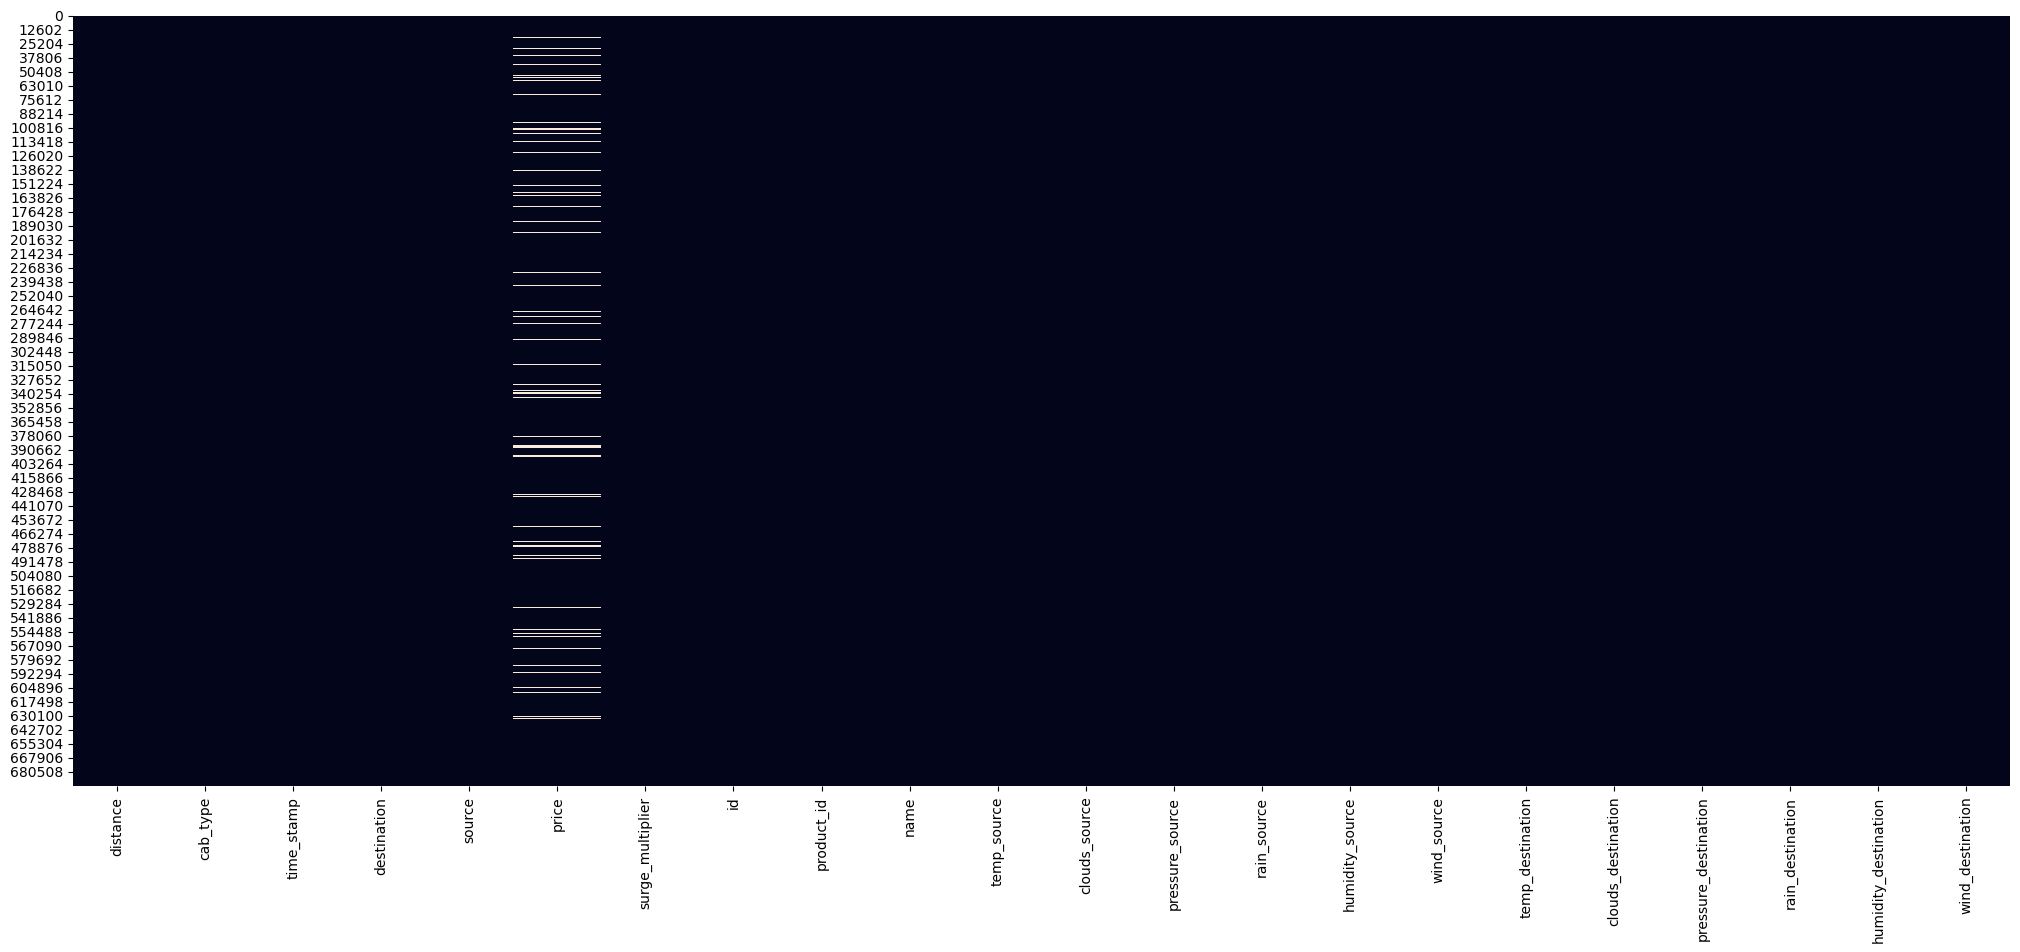

In [15]:
#heatmap to detect frequency of null values
plt.figure(figsize=(25, 10))

sns.heatmap(data.isnull(), cbar=False)

plt.show()

In [16]:
for col in data.columns:
    if col in int_cols or col in float_cols:
        mean_value = data[col].mean()
        print('Filling {} with mean value of {}'.format(col, mean_value))
        data[col].fillna(value=mean_value, inplace=True)

Filling distance with mean value of 2.189429755393113
Filling time_stamp with mean value of 1544045709764.3223
Filling price with mean value of 16.545125490614062
Filling surge_multiplier with mean value of 1.0138697911180816
Filling temp_source with mean value of 39.09107485153707
Filling clouds_source with mean value of 0.6777765125588148
Filling pressure_source with mean value of 1008.4451958305401
Filling rain_source with mean value of 0.057641081462731
Filling humidity_source with mean value of 0.7639679814754422
Filling wind_source with mean value of 6.802864133402415
Filling temp_destination with mean value of 39.09107119328616
Filling clouds_destination with mean value of 0.6777764666467455
Filling pressure_destination with mean value of 1008.4451958421691
Filling rain_destination with mean value of 0.057641112357036346
Filling humidity_destination with mean value of 0.7639680769484043
Filling wind_destination with mean value of 6.802864810137801


In [17]:
check = data.notnull()
check

distance  cab_type  time_stamp  destination  source  price  \
0           True      True        True         True    True   True   
1           True      True        True         True    True   True   
2           True      True        True         True    True   True   
3           True      True        True         True    True   True   
4           True      True        True         True    True   True   
...          ...       ...         ...          ...     ...    ...   
693066      True      True        True         True    True   True   
693067      True      True        True         True    True   True   
693068      True      True        True         True    True   True   
693069      True      True        True         True    True   True   
693070      True      True        True         True    True   True   

        surge_multiplier    id  product_id  name  ...  pressure_source  \
0                   True  True        True  True  ...             True   
1                   True  True        True  True  ...             True   
2                   True  True        True  True  ...             True   
3                   True  True        True  True  ...             True   
4                   True  True        True  True  ...             True   
...                  ...   ...         ...   ...  ...              ...   
693066              True  True        True  True  ...             True   
693067              True  True        True  True  ...             True   
693068              True  True        True  True  ...             True   
693069              True  True        True  True  ...             True   
693070              True  True        True  True  ...             True   

        rain_source  humidity_source  wind_source  temp_destination  \
0              True             True         True              True   
1              True             True         True              True   
2              True             True         True              True   
3              True             True         True              True   
4              True             True         True              True   
...             ...              ...          ...               ...   
693066         True             True         True              True   
693067         True             True         True              True   
693068         True             True         True              True   
693069         True             True         True              True   
693070         True             True         True              True   

        clouds_destination  pressure_destination  rain_destination  \
0                     True                  True              True   
1                     True                  True              True   
2                     True                  True              True   
3                     True                  True              True   
4                     True                  True              True   
...                    ...                   ...               ...   
693066                True                  True              True   
693067                True                  True              True   
693068                True                  True              True   
693069                True                  True              True   
693070                True                  True              True   

        humidity_destination  wind_destination  
0                       True              True  
1                       True              True  
2                       True              True  
3                       True              True  
4                       True              True  
...                      ...               ...  
693066                  True              True  
693067                  True              True  
693068                  True              True  
693069                  True              True  
693070                  True              Tru

In [18]:
#total number of null values in all the columns
data.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price                   0
surge_multiplier        0
id                      0
product_id              0
name                    0
temp_source             0
clouds_source           0
pressure_source         0
rain_source             0
humidity_source         0
wind_source             0
temp_destination        0
clouds_destination      0
pressure_destination    0
rain_destination        0
humidity_destination    0
wind_destination        0
dtype: int64

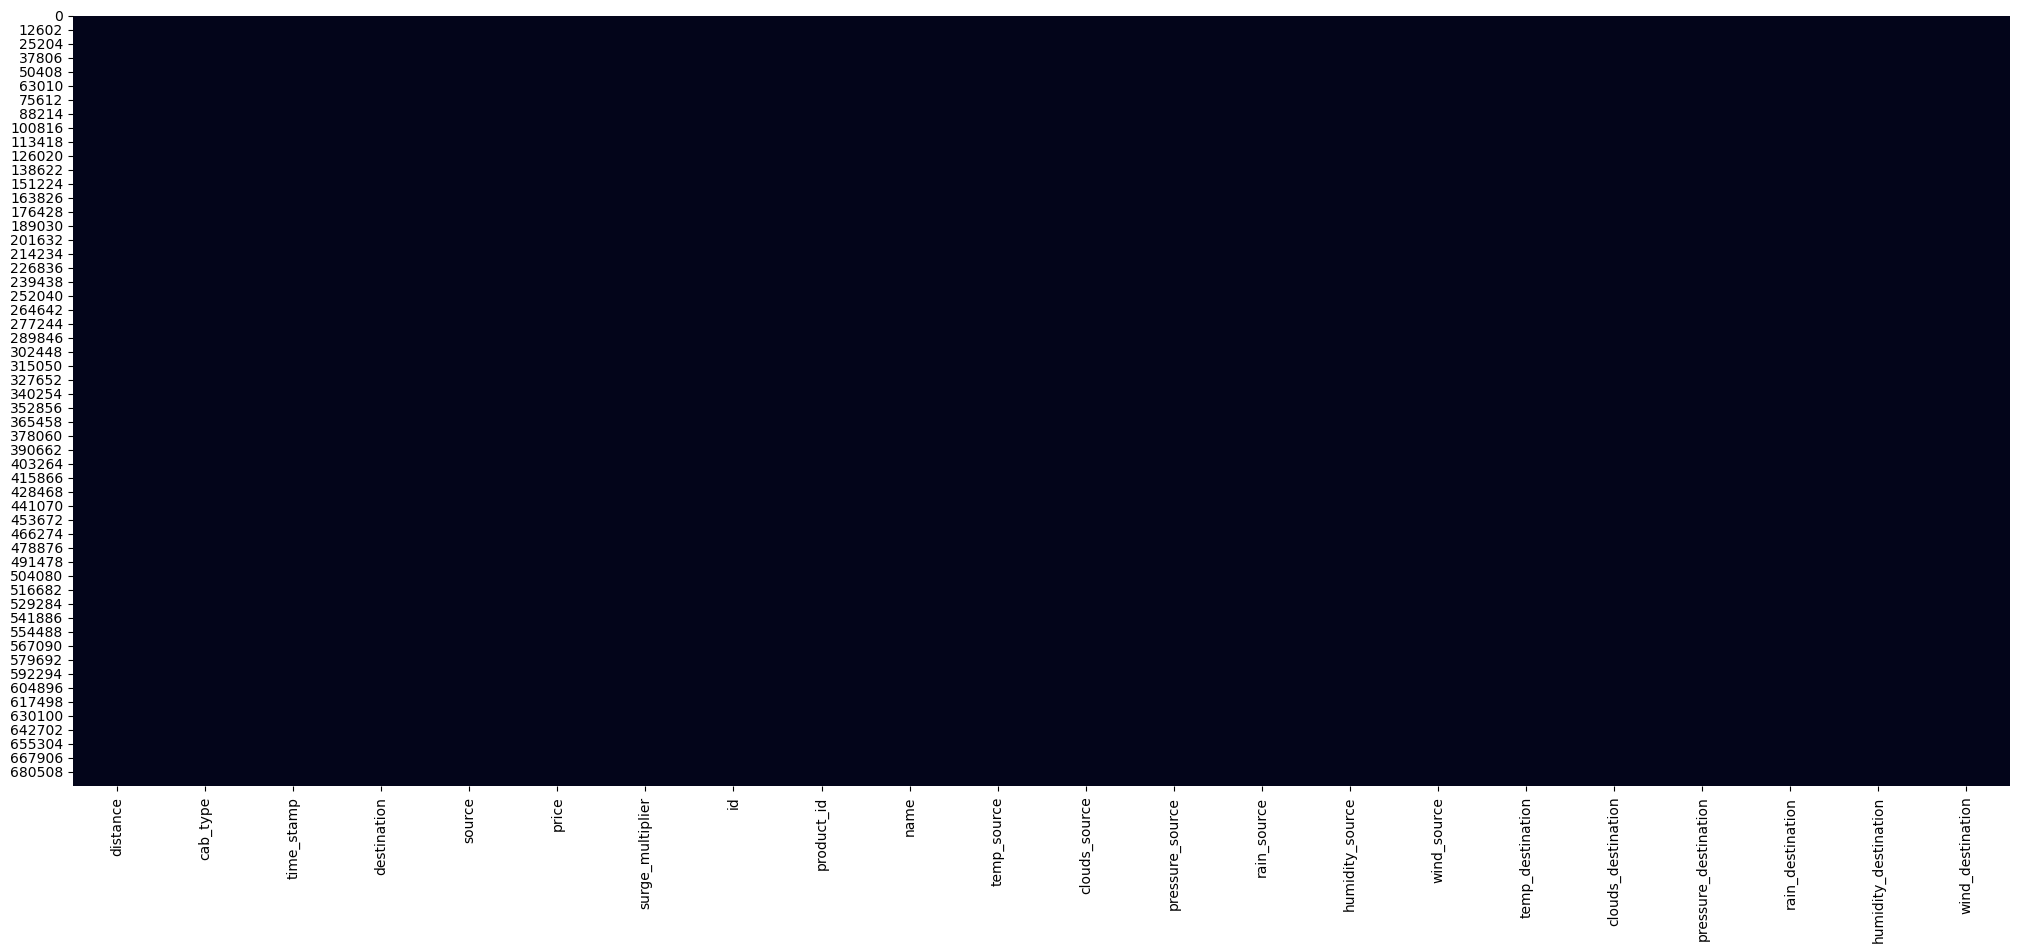

In [19]:
plt.figure(figsize=(25, 10))

sns.heatmap(data.isnull(), cbar=False)

plt.show()

Now, you can notice that all the columns are filled and there are no missing values.

In [20]:
#Description of the dataset after removing null values
data.describe()

distance    time_stamp          price  surge_multiplier  \
count  693071.000000  6.930710e+05  693071.000000     693071.000000   
mean        2.189430  1.544046e+12      16.545125          1.013870   
std         1.138937  6.891925e+08       8.946069          0.091641   
min         0.020000  1.543204e+12       2.500000          1.000000   
25%         1.280000  1.543444e+12       9.500000          1.000000   
50%         2.160000  1.543737e+12      16.000000          1.000000   
75%         2.920000  1.544828e+12      22.500000          1.000000   
max         7.860000  1.545161e+12      97.500000          3.000000   

         temp_source  clouds_source  pressure_source    rain_source  \
count  693071.000000  693071.000000    693071.000000  693071.000000   
mean       39.091075       0.677777      1008.445196       0.057641   
std         0.145898       0.000980         0.006164       0.002291   
min        38.964379       0.676711      1008.435793       0.054197   
25%        38.986711       0.676730      1008.441090       0.054863   
50%        39.047744       0.677495      1008.444168       0.058712   
75%        39.090841       0.678432      1008.447820       0.059593   
max        39.410822       0.679866      1008.459254       0.061352   

       humidity_source    wind_source  temp_destination  clouds_destination  \
count    693071.000000  693071.000000     693071.000000       693071.000000   
mean          0.763968       6.802864         39.091071            0.677776   
std           0.004214       0.054700          0.145895            0.000980   
min           0.754837       6.692180         38.964379            0.676711   
25%           0.763786       6.749426         38.986711            0.676730   
50%           0.764837       6.834302         39.047744            0.677495   
75%           0.767266       6.848948         39.090841            0.678432   
max           0.767992       6.860019         39.410822            0.679866   

       pressure_destination  rain_destination  humidity_destination  \
count         693071.000000     693071.000000         693071.000000   
mean            1008.445196          0.057641              0.763968   
std                0.006164          0.002291              0.004214   
min             1008.435793          0.054197              0.754837   
25%             1008.441090          0.054863              0.763786   
50%             1008.444168          0.058712              0.764837   
75%             1008.447820          0.059593              0.767266   
max             1008.459254          0.061352              0.767992   

       wind_destination  
count     693071.000000  
mean           6.802865  
std            0.054700  
min            6.692180  
25%            6.749426  
50%            6.834302  
75%            6.848948  
max            6.860019

#### 2.2 Outlier Detection

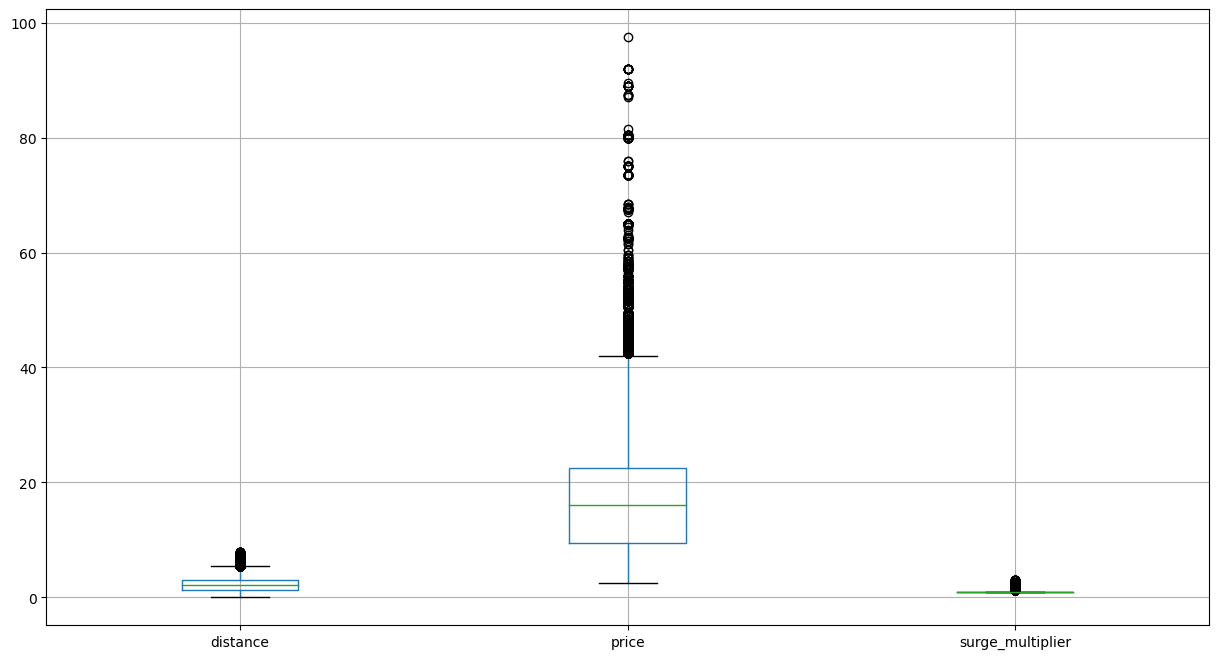

In [21]:
#boxplot to detect outliers
plt.figure(figsize=(15,8))
boxplot = data.boxplot(column=['distance', 'price', 'surge_multiplier'])  

##### Price column has significant amount of outliers

In [23]:
#function to remove outliers
def remove_outliers(df,col):
    Q1 = np.percentile(df[col], 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(df[col], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(df[col] >= (Q3+1.5*IQR))
    lower = np.where(df[col] <= (Q1-1.5*IQR))
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)

In [24]:
#removing outliers
remove_outliers(data,'price')

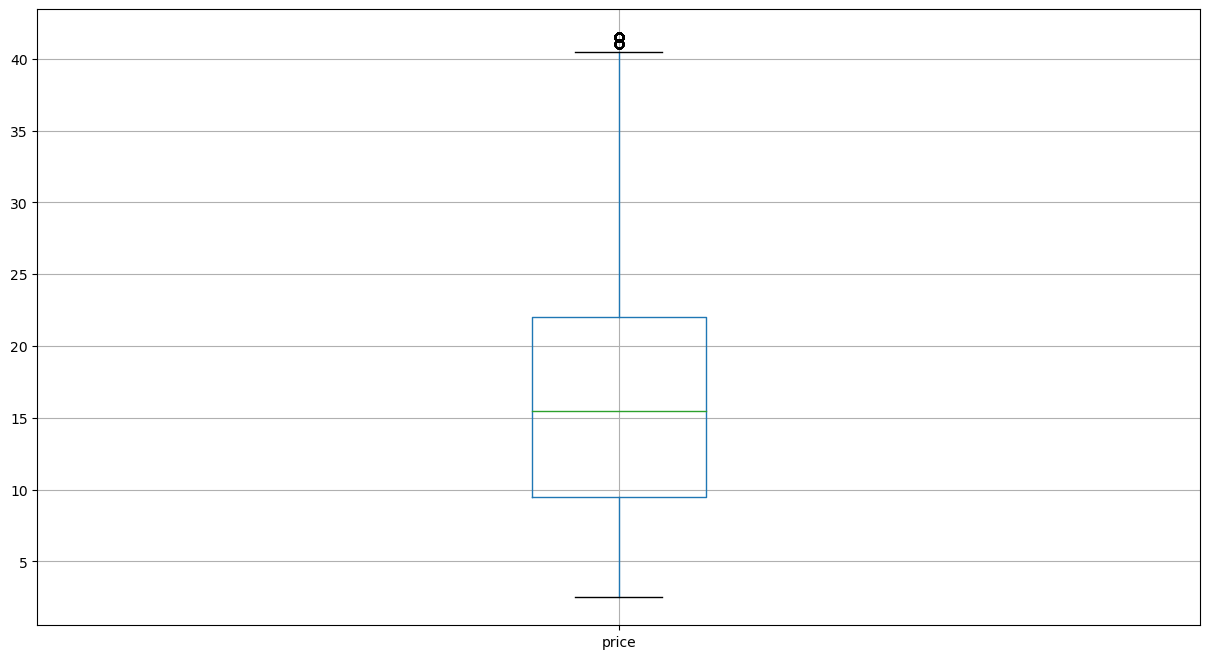

In [25]:
#boxplot of price after removing outliers
plt.figure(figsize=(15,8))
boxplot = data.boxplot(column=['price'])

In [26]:
data.to_csv("exported-data.csv", index=False)
exported_data = pd.read_csv("exported-data.csv")
exported_data

distance cab_type     time_stamp       destination  \
0           0.44     Lyft  1544952607890     North Station   
1           0.44     Lyft  1543284023677     North Station   
2           0.44     Lyft  1543366822198     North Station   
3           0.44     Lyft  1543553582749     North Station   
4           0.44     Lyft  1543463360223     North Station   
...          ...      ...            ...               ...   
684861      0.99     Lyft  1543218373178  Haymarket Square   
684862      0.99     Lyft  1543218373178  Haymarket Square   
684863      0.99     Lyft  1543465761522  Haymarket Square   
684864      0.99     Lyft  1544762405152  Haymarket Square   
684865      0.99     Lyft  1544762405152  Haymarket Square   

                    source  price  surge_multiplier  \
0         Haymarket Square    5.0               1.0   
1         Haymarket Square   11.0               1.0   
2         Haymarket Square    7.0               1.0   
3         Haymarket Square   26.0               1.0   
4         Haymarket Square    9.0               1.0   
...                    ...    ...               ...   
684861  Financial District   27.5               1.0   
684862  Financial District    5.0               1.0   
684863  Financial District   16.5               1.0   
684864  Financial District   10.5               1.0   
684865  Financial District   13.5               1.0   

                                          id    product_id          name  ...  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line        Shared  ...   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier           Lux  ...   
2       981a3613-77af-4620-a42a-0c0866077d1e          lyft          Lyft  ...   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512   lyft_luxsuv  Lux Black XL  ...   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a     lyft_plus       Lyft XL  ...   
...                                      ...           ...           ...  ...   
684861  27e0c87b-2fe6-41e3-91c1-49119da998b0   lyft_luxsuv  Lux Black XL  ...   
684862  4a8497f3-e93e-471d-bc6a-2230027a179d     lyft_line        Shared  ...   
684863  5fb62b74-4383-4872-89f3-2021bf5943fd      lyft_lux     Lux Black  ...   
684864  608d9d2b-c195-47eb-aff5-7d25448186a3     lyft_plus       Lyft XL  ...   
684865  64941bda-40bc-4e2d-bd8f-4a4338b41ee5  lyft_premier           Lux  ...   

        pressure_source  rain_source  humidity_source  wind_source  \
0           1008.445239     0.059593         0.764837     6.843193   
1           1008.445239     0.059593         0.764837     6.843193   
2           1008.445239     0.059593         0.764837     6.843193   
3           1008.445239     0.059593         0.764837     6.843193   
4           1008.445239     0.059593         0.764837     6.843193   
...                 ...          ...              ...          ...   
684861      1008.435793     0.061352         0.754837     6.860019   
684862      1008.435793     0.061352         0.754837     6.860019   
684863      1008.435793     0.061352         0.754837     6.860019   
684864      1008.435793     0.061352         0.754837     6.860019   
684865      1008.435793     0.061352         0.754837     6.860019   

        temp_destination  clouds_destination  pressure_destination  \
0              39.035315            0.676998           1008.442811   
1              39.035315            0.676998           1008.442811   
2              39.035315            0.676998           1008.442811   
3              39.035315            0.676998           1008.442811   
4              39.035315            0.676998           1008.442811   
...                  ...                 ...                   ...   
684861         39.067897            0.676711           1008.445239   
684862         39.067897            0.676711           1008.445239   
684863         39.067897            0.676711           1008.445239   
684864         39.067897            0.676711           1008.445239   
684865         39.

### 3. Describing the Data

In [27]:
#Data types of all the features
data.dtypes

distance                float64
cab_type                 object
time_stamp                int64
destination              object
source                   object
price                   float64
surge_multiplier        float64
id                       object
product_id               object
name                     object
temp_source             float64
clouds_source           float64
pressure_source         float64
rain_source             float64
humidity_source         float64
wind_source             float64
temp_destination        float64
clouds_destination      float64
pressure_destination    float64
rain_destination        float64
humidity_destination    float64
wind_destination        float64
dtype: object

In [28]:
#Feature names
data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'temp_source',
       'clouds_source', 'pressure_source', 'rain_source', 'humidity_source',
       'wind_source', 'temp_destination', 'clouds_destination',
       'pressure_destination', 'rain_destination', 'humidity_destination',
       'wind_destination'],
      dtype='object')

In [29]:
#Description of the merged dataset
data.describe()

distance    time_stamp          price  surge_multiplier  \
count  684866.000000  6.848660e+05  684866.000000     684866.000000   
mean        2.166149  1.544046e+12      16.169310          1.010829   
std         1.115565  6.891663e+08       8.269749          0.078073   
min         0.020000  1.543204e+12       2.500000          1.000000   
25%         1.270000  1.543444e+12       9.500000          1.000000   
50%         2.140000  1.543737e+12      15.500000          1.000000   
75%         2.880000  1.544828e+12      22.000000          1.000000   
max         7.860000  1.545161e+12      41.500000          3.000000   

         temp_source  clouds_source  pressure_source    rain_source  \
count  684866.000000  684866.000000    684866.000000  684866.000000   
mean       39.090413       0.677773      1008.445190       0.057640   
std         0.145125       0.000977         0.006128       0.002281   
min        38.964379       0.676711      1008.435793       0.054197   
25%        38.986711       0.676730      1008.441090       0.056012   
50%        39.047744       0.677495      1008.444168       0.058712   
75%        39.090841       0.678317      1008.447820       0.059537   
max        39.410822       0.679866      1008.459254       0.061352   

       humidity_source    wind_source  temp_destination  clouds_destination  \
count    684866.000000  684866.000000     684866.000000       684866.000000   
mean          0.763989       6.803063         39.090452            0.677773   
std           0.004192       0.054487          0.145243            0.000976   
min           0.754837       6.692180         38.964379            0.676711   
25%           0.764054       6.778528         38.986711            0.676730   
50%           0.764837       6.834302         39.047744            0.677495   
75%           0.767266       6.848948         39.090841            0.678317   
max           0.767992       6.860019         39.410822            0.679866   

       pressure_destination  rain_destination  humidity_destination  \
count         684866.000000     684866.000000         684866.000000   
mean            1008.445183          0.057643              0.763989   
std                0.006120          0.002282              0.004196   
min             1008.435793          0.054197              0.754837   
25%             1008.441090          0.056012              0.764054   
50%             1008.444455          0.058712              0.764837   
75%             1008.447820          0.059593              0.767266   
max             1008.459254          0.061352              0.767992   

       wind_destination  
count     684866.000000  
mean           6.803094  
std            0.054432  
min            6.692180  
25%            6.778528  
50%            6.834302  
75%            6.848948  
max            6.860019

### 4. Analysis of the data


##### 4.1 Univariate Analysis

<AxesSubplot:>

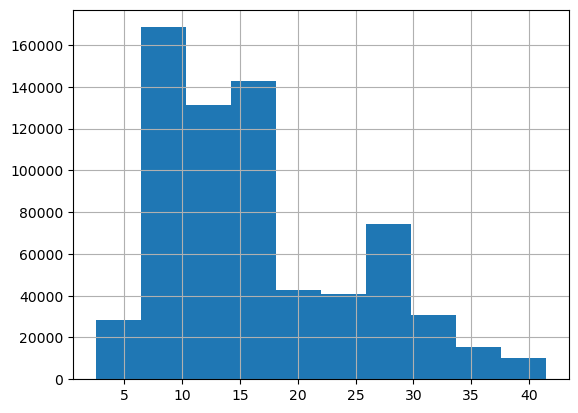

In [31]:
data["price"].hist()

In [32]:
# Only select 20% of data
data.sample(frac=0.01)

distance cab_type     time_stamp              destination  \
308219      4.72     Uber  1545002106010       Financial District   
126323      1.55     Lyft  1543353683654         Theatre District   
373249      1.92     Uber  1544754309315  Northeastern University   
48129       3.22     Uber  1545027611055            North Station   
346194      4.57     Uber  1543651978144       Financial District   
...          ...      ...            ...                      ...   
455190      1.25     Lyft  1545001811564                North End   
373217      1.60     Uber  1545118207011  Northeastern University   
610464      0.57     Lyft  1543448467993            South Station   
318642      3.64     Uber  1543563784856       Financial District   
252125      1.56     Uber  1544991906899                 Back Bay   

                         source  price  surge_multiplier  \
308219        Boston University   26.5               1.0   
126323                North End    7.0               1.0   
373249              Beacon Hill   13.0               1.0   
48129   Northeastern University   25.0               1.0   
346194  Northeastern University   14.5               1.0   
...                         ...    ...               ...   
455190       Financial District   26.0               1.5   
373217              Beacon Hill    8.0               1.0   
610464         Theatre District   10.5               1.0   
318642                   Fenway   34.0               1.0   
252125        Boston University   25.0               1.0   

                                          id  \
308219  b7ca3b7b-15b4-4779-af93-d04a3d1e7dea   
126323  bb22f454-4447-43e6-8cd1-91c797a809a7   
373249  1c07bf52-4f64-47ce-aec9-b282da980274   
48129   d1f69d09-0504-45fa-bbf5-ac138d1f0794   
346194  fef71170-3aba-4ac0-94e6-ac8d7f73dd12   
...                                      ...   
455190  acdcfdc0-1868-4231-b2b7-97253b63dfe0   
373217  4af53f38-81bf-4b12-9a3d-b827151dffce   
610464  2820e36a-6a25-4bef-9176-d33484e56235   
318642  05224d1f-e4dc-4808-97c3-e14e6f62512a   
252125  f2914a09-42ec-4ec9-8af1-10e13c0c018d   

                                  product_id       name  ...  pressure_source  \
308219  6c84fd89-3f11-4782-9b50-97c468b19529      Black  ...      1008.459254   
126323                                  lyft       Lyft  ...      1008.441912   
373249  6f72dfc5-27f1-42e8-84db-ccc7a75f6969     UberXL  ...      1008.448356   
48129   6c84fd89-3f11-4782-9b50-97c468b19529      Black  ...      1008.444168   
346194  55c66225-fbe7-4fd5-9072-eab1ece5e23e      UberX  ...      1008.444168   
...                                      ...        ...  ...              ...   
455190                              lyft_lux  Lux Black  ...      1008.435793   
373217  55c66225-fbe7-4fd5-9072-eab1ece5e23e      UberX  ...      1008.448356   
610464                             lyft_plus    Lyft XL  ...      1008.444742   
318642  6f72dfc5-27f1-42e8-84db-ccc7a75f6969     UberXL  ...      1008.453289   
252125  6d318bcc-22a3-4af6-bddd-b409bfce1546  Black SUV  ...      1008.459254   

        rain_source  humidity_source  wind_source  temp_destination  \
308219     0.054688         0.763786     6.692180         39.410822   
126323     0.058712         0.764054     6.853117         38.986711   
373249     0.057097         0.765048     6.810325         38.975086   
48129      0.054197         0.767648     6.749426         39.035315   
346194     0.054197         0.767648     6.749426         39.410822   
...             ...              ...          ...               ...   
455190     0.061352         0.754837     6.860019         39.090841   
373217     0.057097         0.765048     6.810325         38.975086   
610464     0.060214         0.767992     6.834302         39.394092   
318642     0.054863         0.767266     6.711721         39.410822   
252125     0.054688         0.763786     6.692180         39.082122   

        clouds_destination  pressure_destination  rain_

In [33]:
#Market share of uber and lyft
df =data.groupby(by=["cab_type"]).size().reset_index(name="counts")
print(df)
fig = px.pie(df, values=list(df['counts']), names=df['cab_type'], title='Total Number of rides')
fig.show()

  cab_type  counts
0     Lyft  301175
1     Uber  383691


In [35]:
#Number of rides booked based on location
df1 =data.groupby(by=["destination", "source"]).size().reset_index(name="counts")
df1

destination                   source  counts
0     Back Bay        Boston University    9409
1     Back Bay                   Fenway    9449
2     Back Bay         Haymarket Square    9596
3     Back Bay                North End   10207
4     Back Bay  Northeastern University    9555
..         ...                      ...     ...
67    West End                   Fenway   10082
68    West End         Haymarket Square    9154
69    West End                North End    9212
70    West End  Northeastern University    9426
71    West End            South Station    9528

[72 rows x 3 columns]

#### 4.2 Bivariate Analysis

In [36]:
df_price=data.groupby('cab_type').aggregate({'price':'mean'}).reset_index()
df_price['cab_type'] = df_price['cab_type'].replace({0:'Lyft', 1:'Uber'})
px.bar(data_frame=df_price, x="cab_type", y="price", color="cab_type", barmode="group")

In the above plot we can see that the mean price of Lyft is greater than Uber

In [37]:
df_uber=data[data['cab_type']=='Uber']
df_lyft=data[data['cab_type']=='Lyft']

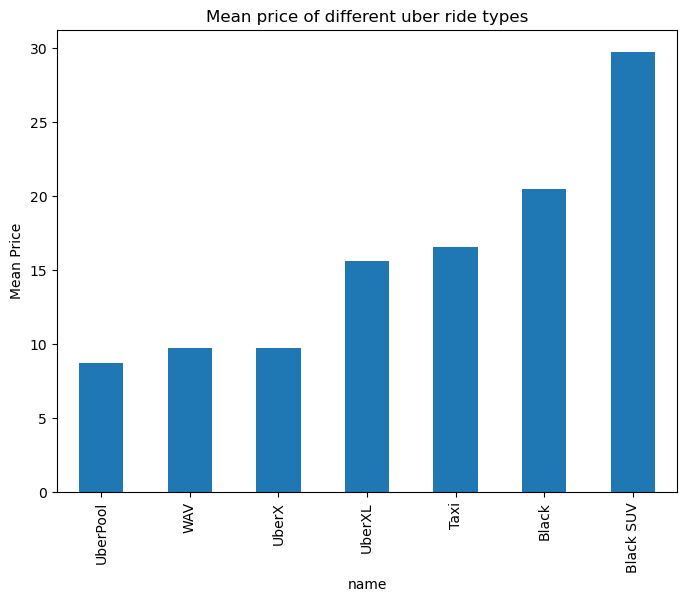

In [38]:
#Mean price of different uber ride types
df_uber_names=df_uber.groupby('name')['price'].mean().sort_values()
plt.figure(figsize=(8,6))
plt.ylabel('Mean Price')
plt.xlabel('Cab Name')
plt.title('Mean price of different uber ride types')
df_uber_names.plot(kind='bar')
plt.show()

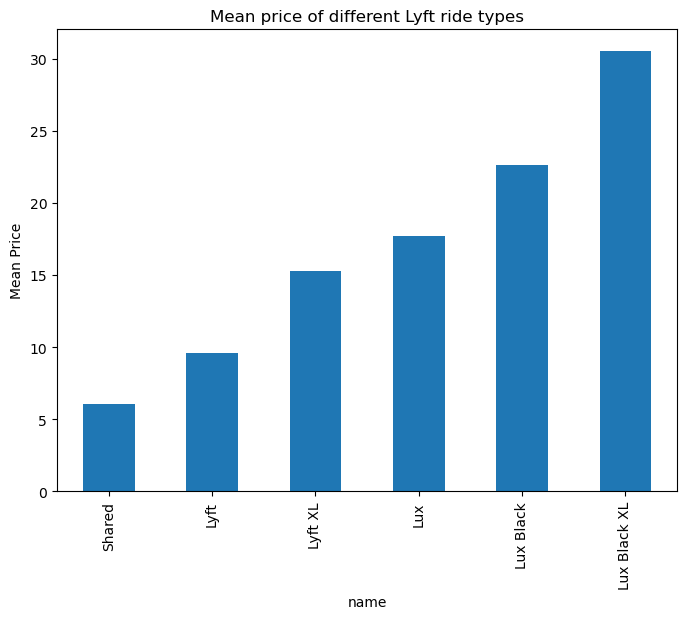

In [39]:
#Mean price of different Lyft ride types
df_lyft_names=df_lyft.groupby('name')['price'].mean().sort_values()
plt.figure(figsize=(8,6))
plt.ylabel('Mean Price')
plt.xlabel('Cab Name')
plt.title('Mean price of different Lyft ride types')
df_lyft_names.plot(kind='bar')
plt.show()

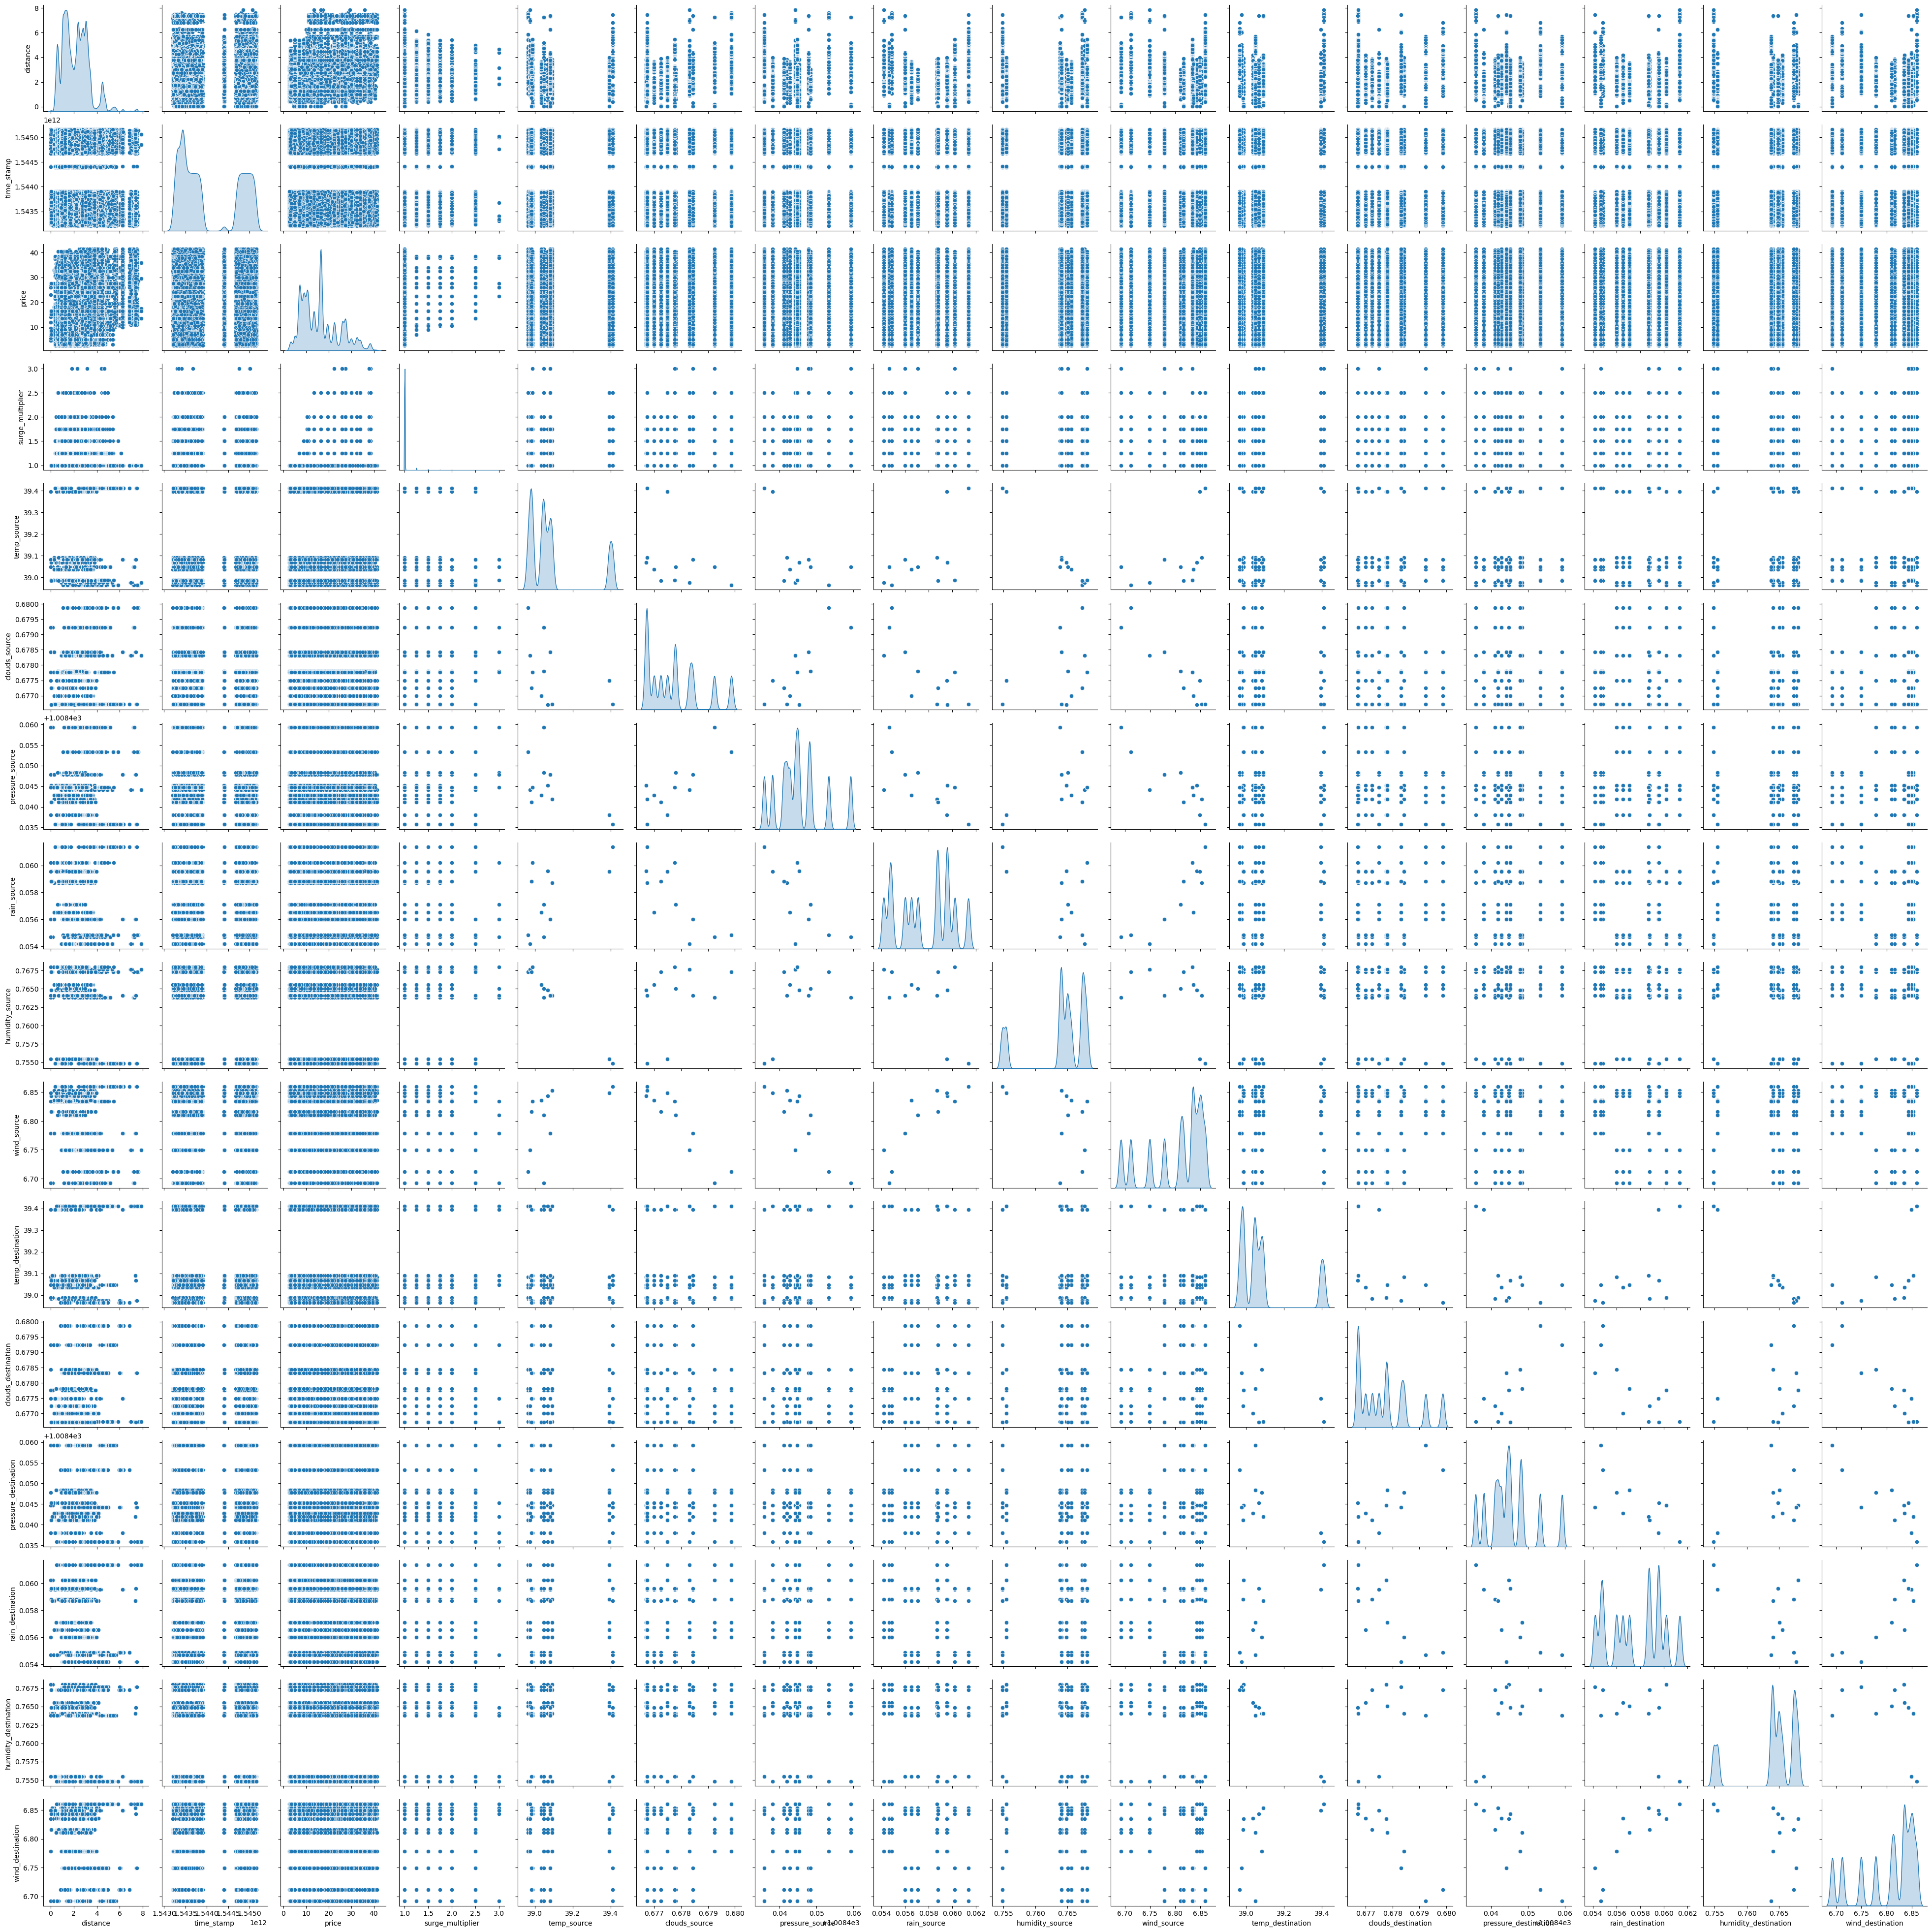

In [40]:
sns.pairplot(data,diag_kind="kde")

In [41]:
df2 =data.groupby(by=["distance", "price"]).size().reset_index(name="counts")
df2

distance      price  counts
0          0.02   5.500000       2
1          0.02   6.500000      22
2          0.02   7.500000       6
3          0.02   8.500000       8
4          0.02   9.500000       2
...         ...        ...     ...
18792      7.86  13.500000       1
18793      7.86  16.545125       1
18794      7.86  17.500000       2
18795      7.86  29.500000       1
18796      7.86  36.000000       1

[18797 rows x 3 columns]

In [42]:
px.bar(data_frame=df2, x="distance", y="price", color="distance", barmode="group")


This bar plot clearly indicates that the price increases as the distance increases.
Also, for the same distance - the price varies for each and every ride.

#### Heat map to find correlation

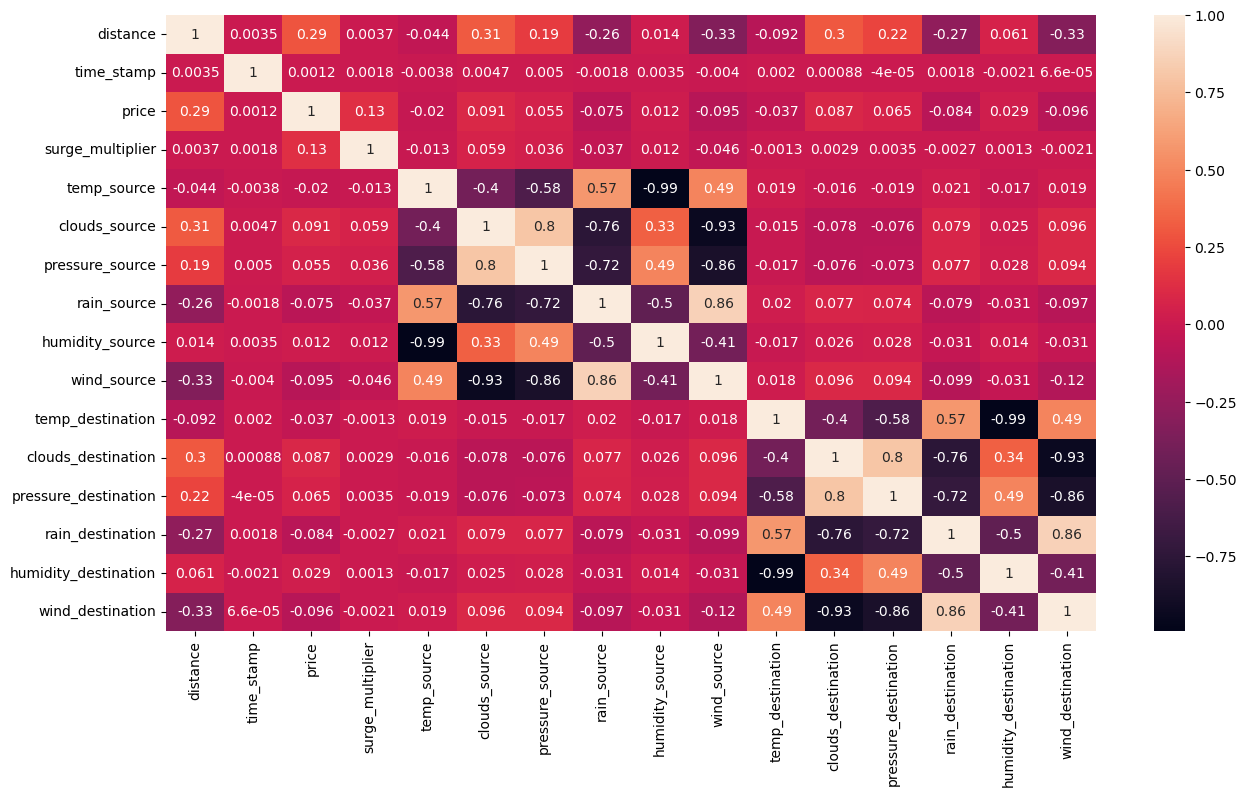

In [43]:
plt.figure(figsize=(15,8))

ax = sns.heatmap(data.corr(),annot=True)

In the above plot we can see that distance and surge-multiplier are highly correlated with price, and weather conditions are 
#highly correlated with eash other. 

In [44]:
df3 = data.groupby(by=["name","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df3, x="name", y="counts", color="cab_type", barmode="group")

### 5. Data Pre-Processing

### 5.1 Feature Engineering

In [45]:
#replacing Lyft with 0 and Uber with 1
data['cab_type'] = data['cab_type'].replace({'Lyft': 0, 'Uber': 1})

In [46]:
categorical_columns = ['name','source','destination']


### 5.1.1 One Hot Encoding

In [47]:
df= pd.get_dummies(data = data,
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
df=df.drop('id',axis=1)
df=df.drop('product_id',axis=1)

In [48]:
df

distance  cab_type     time_stamp  price  surge_multiplier  \
0           0.44         0  1544952607890    5.0               1.0   
1           0.44         0  1543284023677   11.0               1.0   
2           0.44         0  1543366822198    7.0               1.0   
3           0.44         0  1543553582749   26.0               1.0   
4           0.44         0  1543463360223    9.0               1.0   
...          ...       ...            ...    ...               ...   
693066      0.99         0  1543218373178   27.5               1.0   
693067      0.99         0  1543218373178    5.0               1.0   
693068      0.99         0  1543465761522   16.5               1.0   
693069      0.99         0  1544762405152   10.5               1.0   
693070      0.99         0  1544762405152   13.5               1.0   

        temp_source  clouds_source  pressure_source  rain_source  \
0         39.067897       0.676711      1008.445239     0.059593   
1         39.067897       0.676711      1008.445239     0.059593   
2         39.067897       0.676711      1008.445239     0.059593   
3         39.067897       0.676711      1008.445239     0.059593   
4         39.067897       0.676711      1008.445239     0.059593   
...             ...            ...              ...          ...   
693066    39.410822       0.676730      1008.435793     0.061352   
693067    39.410822       0.676730      1008.435793     0.061352   
693068    39.410822       0.676730      1008.435793     0.061352   
693069    39.410822       0.676730      1008.435793     0.061352   
693070    39.410822       0.676730      1008.435793     0.061352   

        humidity_source  ...  destination_Boston University  \
0              0.764837  ...                              0   
1              0.764837  ...                              0   
2              0.764837  ...                              0   
3              0.764837  ...                              0   
4              0.764837  ...                              0   
...                 ...  ...                            ...   
693066         0.754837  ...                              0   
693067         0.754837  ...                              0   
693068         0.754837  ...                              0   
693069         0.754837  ...                              0   
693070         0.754837  ...                              0   

        destination_Fenway  destination_Financial District  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   
...                    ...                             ...   
693066                   0                               0   
693067                   0                               0   
693068                   0                               0   
693069                   0                               0   
693070                   0                               0   

        destination_Haymarket Square  destination_North End  \
0                                  0                      0   
1                                  0                      0   
2                                  0                      0   
3                                  0                      0   
4                                  0                      0   
...                              ...                    ...   
693066                             1                      0   
693067                             1                      0   
693068                             1                      0   
693069                             1                      0   
693070                             1                      0   

        destination_North Station  destination_Northeastern University  \
0                

### 6. Model Building

### 6.1 Train Validation Test Split

In [49]:
from sklearn.model_selection import train_test_split
X=df.drop('price',axis=1)
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


### 6.2. Linear Regression

In [51]:
#Importing the Linear Regression class
from sklearn.linear_model import LinearRegression

In [52]:
#fitting the model to training data
rgr=LinearRegression()
rgr.fit(X_train,y_train)

LinearRegression()

In [53]:
#prediction on test data
y_pred=rgr.predict(X_test)

In [54]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("M score is %f"%mean_squared_error(y_test,y_pred))
print("R2 score is ",r2_score(y_test,y_pred))
MSE_linear=mean_squared_error(y_test,y_pred)
R2_score_linear=r2_score(y_test,y_pred)


M score is 5.196865
R2 score is  0.9237382210306084


In [55]:
#cross-validation scores
#using a five_fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rgr, X_train, y_train, cv=5)
pd.DataFrame(cv_scores,columns=['Score'])

Score
0  0.924338
1  0.925108
2  0.924446
3  0.924160
4  0.921838

In [56]:
#We can observe that cross_validation scores are very close to eachother

### 6.3 Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
X_t=X_train[:6000]
y_t=y_train[:6000]

rfr = RandomForestRegressor(n_estimators = 500, random_state = 0, n_jobs = -1)
rfr.fit(X_t, y_t)


RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)

In [58]:
y_pred_regfor=rfr.predict(X_test)

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("M score is %f"%mean_squared_error(y_test,y_pred_regfor))
print("R2 score is ",r2_score(y_test,y_pred_regfor))
MSE_rfr=mean_squared_error(y_test,y_pred_regfor)
R2_score_rfr=r2_score(y_test,y_pred_regfor)


M score is 3.096856
R2 score is  0.954554952881733


### 6.4 Support Vector Machine

In [60]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()

Defining the parametres for SVR and using GridSearchCV to find the best parametres for our model

In [62]:

parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
clf = GridSearchCV(svr, parameters)
clf.fit(X_t, y_t)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly')})

In [63]:
y_pred_svr=clf.predict(X_test)

In [64]:
print("M score is %f"%mean_squared_error(y_test,y_pred_svr))

M score is 5.346961


In [65]:
print("R2 score is ",r2_score(y_test,y_pred_svr))

R2 score is  0.9215356325480915


In [66]:
#Best parametres for our SVR model
clf.best_params_

{'C': 10, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}

In [67]:
MSE_svmr=mean_squared_error(y_test,y_pred_svr)
R2_score_svm=r2_score(y_test,y_pred_svr)

### 6.5 Model Comparison

In [68]:
#preparing data for models comparision
labels=["Linear Regression","Random Forest Regressor","Support Vector Regression"]
MSE_scores=[MSE_linear,MSE_rfr,MSE_svmr]
R2_scores=[R2_score_linear,R2_score_rfr,R2_score_svm]

#### 6.5.1 Comparing MSE scores

([<matplotlib.patches.Wedge at 0x7f8f5c47a340>,
 [Text(0.4017773145809754, 1.0239995065858676, 'Linear Regression'),
  Text(-1.0993428223552124, 0.038017876532967045, 'Random Forest Regressor'),
  Text(0.3661461092350424, -1.0372738436363083, 'Support Vector Regression')])

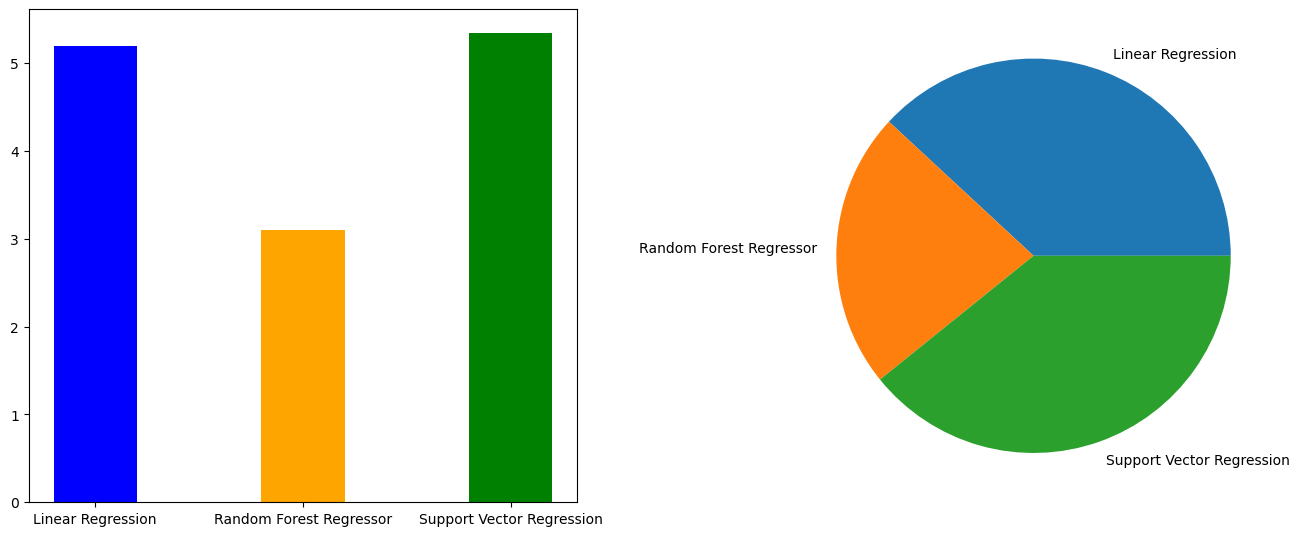

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))
fig.tight_layout(pad=10.0)
ax1.bar(labels, MSE_scores,width = 0.4,color=['blue', 'orange','green'])
ax2.pie(MSE_scores,labels=labels)

#### 6.5.2 Comparing R2 scores

([<matplotlib.patches.Wedge at 0x7f8fd1724f40>,
 [Text(0.5601636645466909, 0.9466872075409187, 'Linear Regression'),
  Text(-1.0999966407782775, -0.002718506300375683, 'Random Forest Regressor'),
  Text(0.5625013906488844, -0.9453000505226219, 'Support Vector Regression')])

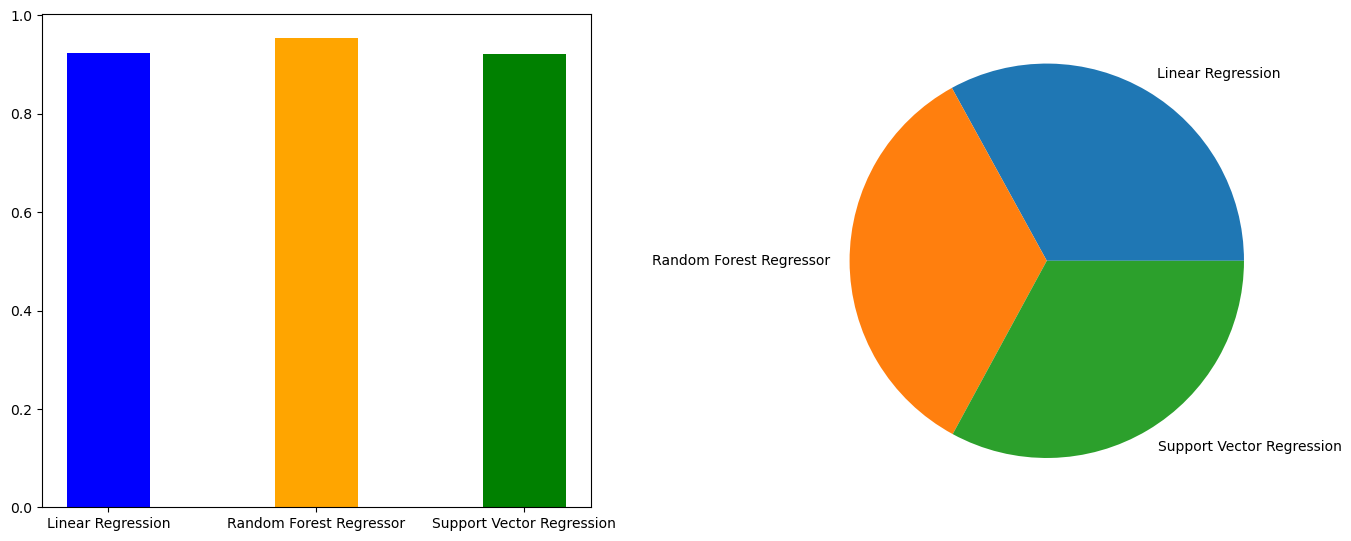

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))
fig.tight_layout(pad=10.0)
ax1.bar(labels, R2_scores,width = 0.4,color=['blue', 'orange','green'])
ax2.pie(R2_scores,labels=labels)